In [1]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import cv2

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.models import load_model
import numpy as np
import time
from gtts import gTTS
import os
import win32com.client

In [3]:
batch_size = 128
num_classes = 10
epochs = 15

In [4]:
img_rows, img_cols = 28, 28

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Digit Image - 5


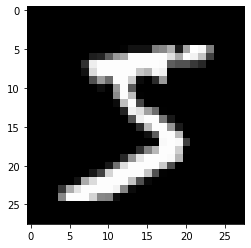

In [6]:
print('Digit Image - {}'.format(y_train[0]))
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()

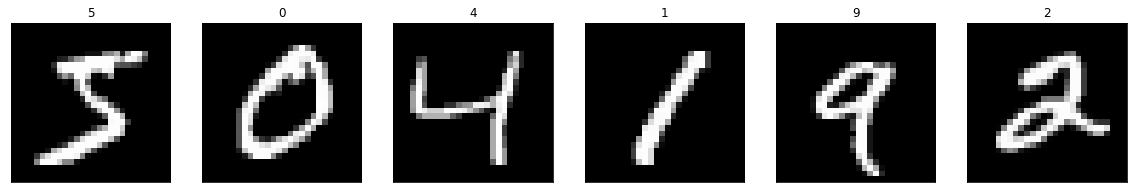

In [7]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape(28,28), cmap='gray')
    ax.set_title(str(y_train[i]))

In [8]:
K.image_data_format()

'channels_last'

In [9]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    

In [10]:
input_shape = (img_rows, img_cols, 1)

In [11]:
x_train = x_train.astype('float32')

In [12]:
x1 = x_train.copy()
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              3278848   
________

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)







Test accuracy: 10.8900%


In [18]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 10s 174us/step - loss: 0.2216 - acc: 0.9316 - val_loss: 0.0507 - val_acc: 0.9837
Epoch 2/15
60000/60000 [==============================] - 9s 154us/step - loss: 0.0644 - acc: 0.9799 - val_loss: 0.0351 - val_acc: 0.9875
Epoch 3/15
60000/60000 [==============================] - 9s 150us/step - loss: 0.0469 - acc: 0.9852 - val_loss: 0.0256 - val_acc: 0.9918
Epoch 4/15
60000/60000 [==============================] - 9s 152us/step - loss: 0.0376 - acc: 0.9884 - val_loss: 0.0229 - val_acc: 0.9924
Epoch 5/15
60000/60000 [==============================] - 9s 151us/step - loss: 0.0318 - acc: 0.9904 - val_loss: 0.0232 - val_acc: 0.9920
Epoch 6/15
60000/60000 [==============================] - 9s 149us/step - loss: 0.0280 - acc: 0.9907 - val_loss: 0.0246 - val_acc: 0.9917
Epoch 7/15
60000/60000 [=

In [19]:
model.save('Digit_CNN.h5')

In [20]:
model.load_weights('Digit_CNN.h5')

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.021117803292397094
Test accuracy: 0.9943


In [22]:
camera = cv2.VideoCapture(0)
x = 0
y = 80
w = 250
n = 0
h = 220
while 1:
    return_value, image = camera.read()
    m = cv2.rectangle(image,(x,y),(x+w,y+h),color=(0,0,255),thickness=4)
    roi = image[y:y+h, x:x+w]
    gray = cv2.cvtColor(~roi, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    img1 = cv2.resize(thresh1, (28, 28))
    x1 = img1.reshape(1, img_rows, img_cols, 1)
    x1 = x1.astype('float32')
    x1 /= 255
    for i in range(0,1):
        cv2.imwrite('opencv'+str(i)+'.png', roi)
    img2 = cv2.resize(image, (1080, 780))
    thresh2 = cv2.resize(thresh1, (800, 600))
    predicted1 = model.predict_proba(x1)
    predicted2 = model.predict_classes(x1)
    m2 = predicted1.max()
    font = cv2.FONT_HERSHEY_SIMPLEX
    font= cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (10,540)
    bottomLeftCornerOfText1 = (10,580)
    bottomLeftCornerOfText2 = (50,120)
    fontScale  = 1
    fontColor  = (255,255,255)
    lineType   = 2
    cv2.putText(img2,str("Prediction Block"), bottomLeftCornerOfText2, font, fontScale,fontColor,lineType)
    if m2 >= 0.95:
        cv2.putText(img2,str(predicted2), bottomLeftCornerOfText, font, fontScale,fontColor,lineType)
        cv2.putText(img2,str(m2), bottomLeftCornerOfText1, font, fontScale,fontColor,lineType)
    cv2.imshow('Digit_Detection',img2)
    cv2.imshow('Thresh_Image',thresh1)
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break

camera.release() 

cv2.destroyAllWindows()

In [24]:
sp = []
sp1 = []
roi2 = []
i = 0
speaker = win32com.client.Dispatch("SAPI.SpVoice")
image = cv2.imread("6.png")
kernel = np.ones((5,5),np.uint8)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)
ret,thresh1 = cv2.threshold(edged,127,255,cv2.THRESH_BINARY)
dilation = cv2.dilate(thresh1,kernel,iterations = 1)
(cnts, m) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for (c) in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    x = x-4
    y = y-12
    if w >= 0 and h >= 0:
        m1 = cv2.rectangle(image, (x, y), (x + w+10, y + h+25), (0, 0, 0), 1)
        roi1 = dilation[y:y+h+25, x:x+w+10]
        roi2.append(roi1)
        img1 = cv2.resize(roi1, (28, 28))
        x1 = img1.reshape(1, img_rows, img_cols, 1)
        x1 = x1.astype('float32')
        x1 /= 255
        predicted1 = model.predict_proba(x1)
        predicted2 = model.predict_classes(x1)
        m2 = predicted1.max()
        m = str(m2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        font= cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText = (10,540)
        bottomLeftCornerOfText1 = (10,580)
        bottomLeftCornerOfText2 = (50,120)
        fontScale  = 1
        fontColor  = (250,0,70)
        lineType   = 2
        cv2.putText(image,str(predicted2[0]),(x+5, y+100),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
        cv2.putText(image,m[:5],(x+5, y+120),cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 0), 1)
        sp.append(predicted2[0])
        sp1.append(m[:5])
        cv2.imshow('Digit_Detection',image)
cv2.waitKey(0)
for i in range(len(sp)):        
    speaker.Speak("I am {0}% sure that the digit is {1}".format(float(sp1[i])*100,sp[i]))
cv2.destroyAllWindows()
cv2.imwrite('opencv'+ str(i) +'.png', image)
i += 1